# Individual Project Proposal - Yolanda Peng

In [1]:
# loading libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# PART 1: Data Description

In [2]:
# reading in data
players_data <- read_csv("data/players.csv")
sessions_data <- read_csv("data/sessions.csv")

players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


### Explaining the datasets
The observations from the above datasets were collected through a Minecraft server set up by a research group in Computer Science UBC led by Frank Wood looking to collect data regarding how individuals play video games. The first dataset includes information about a list of all unique players, including data about each player. The second dataset refers to a list of individual play sessions by each player, including data about the session. The data was collected through a MineCraft server set up by the research group through PLAICraft, where players' actions and information were recorded as they navigated through the world.

In [3]:
# Calculating Summary Statistics

print("players.csv summary statistics")
players_summary <- summary(players_data) 
players_summary

print("sessions.csv summary statistics")
sessions_summary <- summary(sessions_data)
sessions_summary


[1] "players.csv summary statistics"


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

[1] "sessions.csv summary statistics"


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [4]:
print("**players.csv summary statistics rounded**")

# summary of played_hours in players.csv data rounded
players_mean_hours <- players_data |>
                summarise(mean_hours = mean(played_hours)) |>
                round(2) |>
                pull()
players_median_hours <- players_data |>
                summarise(median_hours = median(played_hours)) |>
                round(2) |>
                pull()
players_min_hours <- players_data |>
                summarise(min_hours = min(played_hours)) |>
                round(2) |>
                pull()
players_max_hours <- players_data |>
                summarise(max_hours = max(played_hours)) |>
                round(2) |>
                pull()
print(paste("mean time played (hr): ", players_mean_hours))
print(paste("median time played (hr): ", players_median_hours))
print(paste("max time played (hr): ", players_max_hours))
print(paste("min time played (hr): ", players_min_hours))

# summary of age in players.csv data rounded
players_mean_age <- players_data |>
                summarise(mean_age = mean(Age, na.rm = TRUE)) |>
                round(2) |>
                pull()
players_median_age <- players_data |>
                summarise(median_age = median(Age, na.rm = TRUE)) |>
                round(2) |>
                pull()
players_min_age <- players_data |>
                summarise(min_age = min(Age, na.rm = TRUE)) |>
                round(2) |>
                pull()
players_max_age <- players_data |>
                summarise(max_age = max(Age, na.rm = TRUE)) |>
                round(2) |>
                pull()

print(paste("mean age (year): ", players_mean_age))
print(paste("median age (year): ", players_median_age))
print(paste("max age (year): ", players_max_age))
print(paste("min age (year): ", players_min_age))

[1] "**players.csv summary statistics rounded**"
[1] "mean time played (hr):  5.85"
[1] "median time played (hr):  0.1"
[1] "max time played (hr):  223.1"
[1] "min time played (hr):  0"
[1] "mean age (year):  21.14"
[1] "median age (year):  19"
[1] "max age (year):  58"
[1] "min age (year):  9"


### Descriptive Summary
#### `players.csv` Dataset
- There are a total of **196 observations** included in this dataset (corresponding to the number of rows)
- There are a total of **7 variables** (corresponding to the number of columns): 
    - `experience` - How much experience a user has with the game; 5 categories: `Veteran`, `Pro`, `Regular`, `Beginner`, `Amateur`
    - `subscribe` - Whether the player is subscribed to a game-related newsletter, can be `TRUE` or `FALSE`
    - `hashedEmail` - The email of the player, hashed for privacy/anonymity reasons
    - `played_hours` - The amount of time the player spent playing the game in hours
    - `name` - The provided name of the player
    - `gender` - The gender of the player, specified by the player
    - `Age` - The age of the player in years, provided by the player
<br>
<br>

 - Variable types:
    - `experience`, `hashedEmail`, `name`, `gender` has type `<chr>`
    - `played_hours`, `Age` has type `<dbl`
    - `subscribe` has type `<lgl>`

In [5]:
print("**sessions.csv summary statistics rounded**")

# summary of original_start_time in sessions.csv data rounded
mean_start_time <- sessions_data |>
                summarise(mean_start_time = mean(original_start_time)) |>
                round(2) |>
                pull()
median_start_time <- sessions_data |>
                summarise(median_start_time = median(original_start_time)) |>
                round(2) |>
                pull()
min_start_time <- sessions_data |>
                summarise(min_start_time = min(original_start_time)) |>
                round(2) |>
                pull()
max_start_time <- sessions_data |>
                summarise(max_start_time = max(original_start_time)) |>
                round(2) |>
                pull()
print(paste("mean start time (s): ", mean_start_time))
print(paste("median start time (s): ", median_start_time))
print(paste("max start time (s): ", max_start_time))
print(paste("min start time (s): ", min_start_time))

# summary of original_end_time in sessions.csv data rounded
mean_end_time <- sessions_data |>
                summarise(mean_age = mean(original_end_time, na.rm = TRUE)) |>
                round(2) |>
                pull()
median_end_time <- sessions_data |>
                summarise(median_age = median(original_end_time, na.rm = TRUE)) |>
                round(2) |>
                pull()
min_end_time <- sessions_data |>
                summarise(min_age = min(original_end_time, na.rm = TRUE)) |>
                round(2) |>
                pull()
max_end_time <- sessions_data |>
                summarise(max_age = max(original_end_time, na.rm = TRUE)) |>
                round(2) |>
                pull()

print(paste("mean end time (s): ", mean_end_time))
print(paste("median end time (s): ", median_end_time))
print(paste("max aend time (s): ", max_end_time))
print(paste("min end time (s): ", min_end_time))

[1] "**sessions.csv summary statistics rounded**"
[1] "mean start time (s):  1719201355048.86"
[1] "median start time (s):  1.7192e+12"
[1] "max start time (s):  1.72733e+12"
[1] "min start time (s):  1.7124e+12"
[1] "mean end time (s):  1719195949119.37"
[1] "median end time (s):  1.71918e+12"
[1] "max aend time (s):  1.72734e+12"
[1] "min end time (s):  1.7124e+12"


#### `sessions.csv` Dataset 
- There are a total of **1535 observations** included in this dataset (corresponding to the number of rows)
- There are a total of **5 variables** (corresponding to the number of columns): 
    - `hashedEmail` - The email of the player, hashed for privacy/anonymity reasons
    - `start-time` - The start time of the session in Day/Month/Year, 24h time format
    - `end_time` - The end time of the session in Day/Month/Year, 24h time format
    - `original_start_time` - The start time before being converted into Day/Month/Year, 24h time format
    - `original_end_time` - The end time before being converted into Day/Month/Year, 24h time format
<br>
<br>

 - Variable types:
    - `hashedEmail`, `start_time`, `end_time` has type `<chr>`
    - `original_start_time`, `original_end_time` has type `<dbl`

### Issues with the Data
Some issues I see in the given data is that it is unclear how exactly the variables `original_start_time` and `original_end_time` are represented and what units they take on. I also believe that it would be helpful to include a variable representing the time between the start and end times of a session, in order to make it easier to find the summary statistics for the length of each session in addition to the start and end times. Additionally, the values of the `hashedEmail` variable are lengthy and not human-readable, which could potentially make it difficult to compare/relate the data from the sessions dataset with the players dataset.

# PART 2: Questions

The broad question I am looking to address is **which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.** The specific question I will address is: **Can `experience` and `gender` predict `played_hours` in the `players.csv` dataset?** The `players.csv` dataset already includes the necessary explanatory and predictive variables needed to answer the question. By plotting the `experience` and `gender` variables as factors against the `played_hours`, we may be able to predict, with linear regression, the play time of certain "kinds" of players and thus the amount of data they contribute. It will be necessary to convert the `experience` and `gender` variables to a categorial type rather than `<chr>`.

# PART 3: Exploratory Data Analysis and Visualization 

In [6]:
# wrangling players.csv
players_data_wrangled <- players_data |>
                as_tibble() |>
                mutate(experience = as_factor(experience), gender = as_factor(gender))
players_data_wrangled

# wrangling sessions.csv
sessions_data_wrangled <- sessions_data |>
                as_tibble() |>
                mutate(start_time = as_datetime(start_time), end_time = as_datetime(end_time))
sessions_data_wrangled

# creating players.csv mean value table
players_mean_table <- tibble(variable = c("played_hours", "Age"), mean = c(players_mean_hours, players_mean_age)) |>
                      mutate(mean = unlist(mean))
players_mean_table

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2030-06-21 00:18:12,2030-06-21 00:18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2017-06-21 00:23:33,2017-06-21 00:23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2025-07-21 00:17:34,2025-07-21 00:17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2028-07-21 00:15:36,2028-07-21 00:15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2025-07-21 00:06:15,2025-07-21 00:06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2020-05-21 00:02:26,2020-05-21 00:02:45,1.71617e+12,1.71617e+12


variable,mean
<chr>,<dbl>
played_hours,5.85
Age,21.14


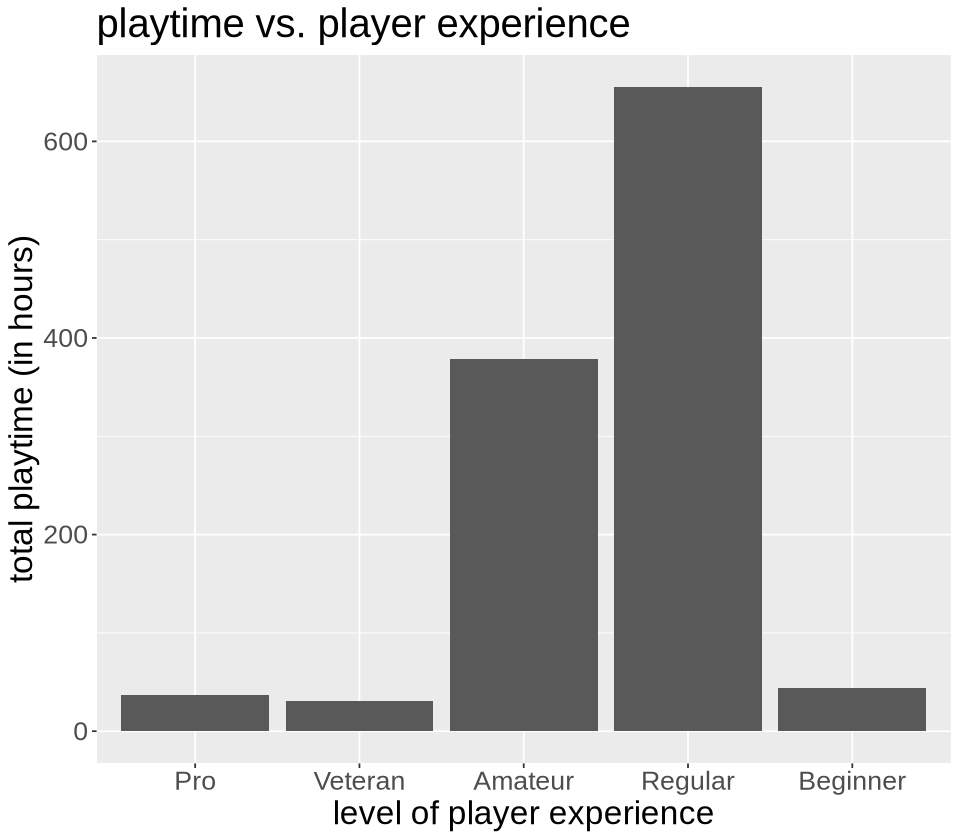

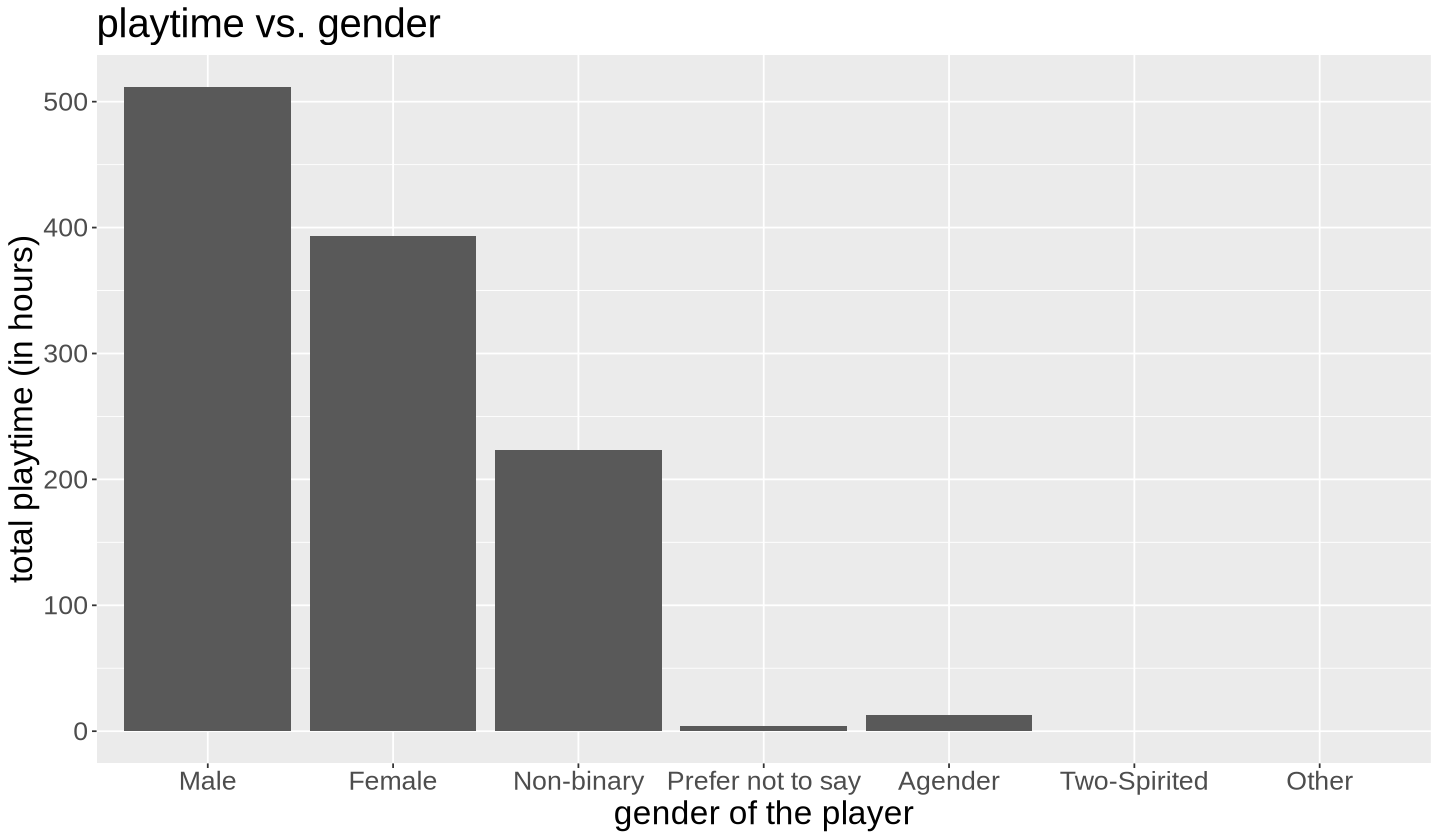

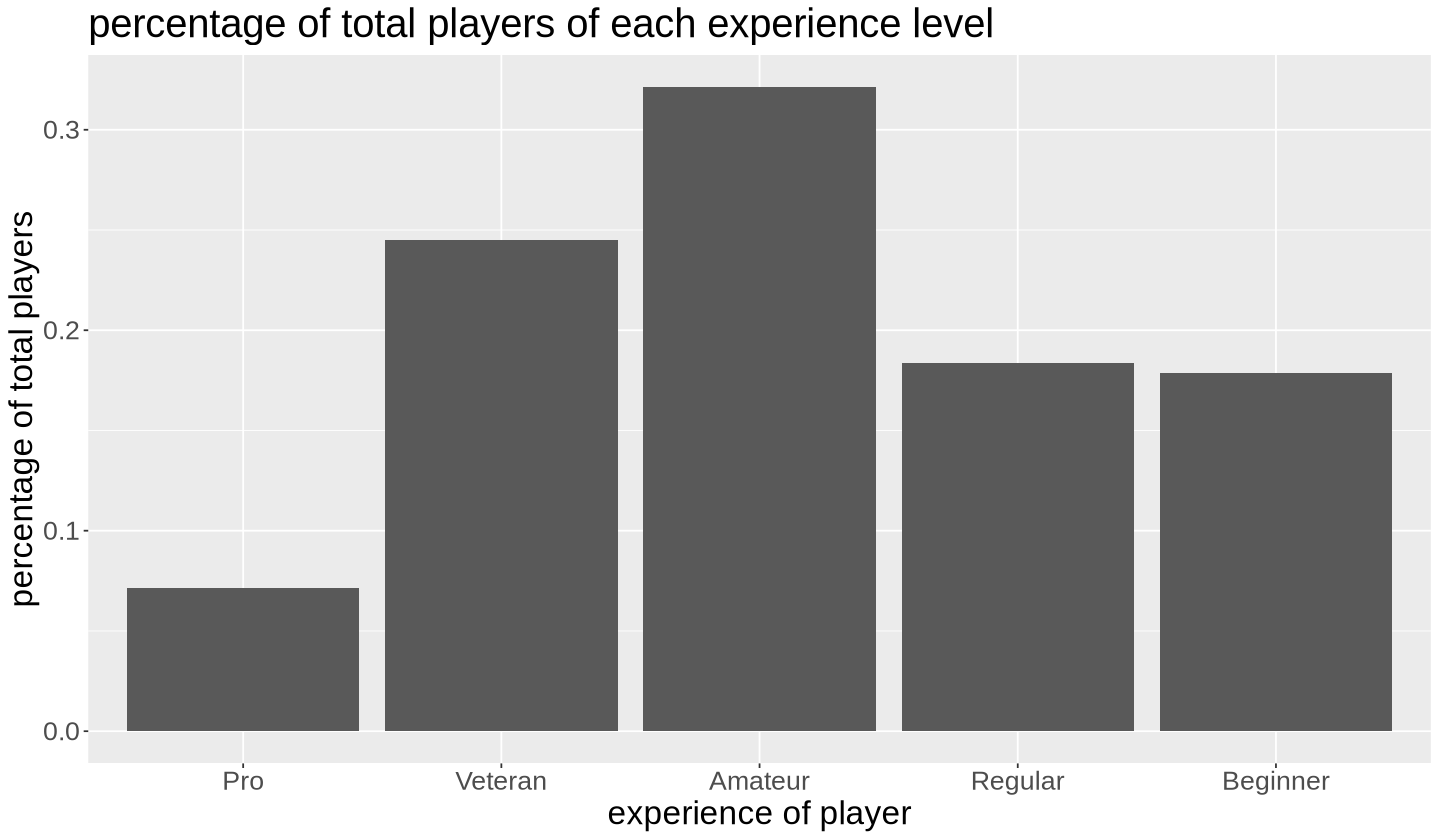

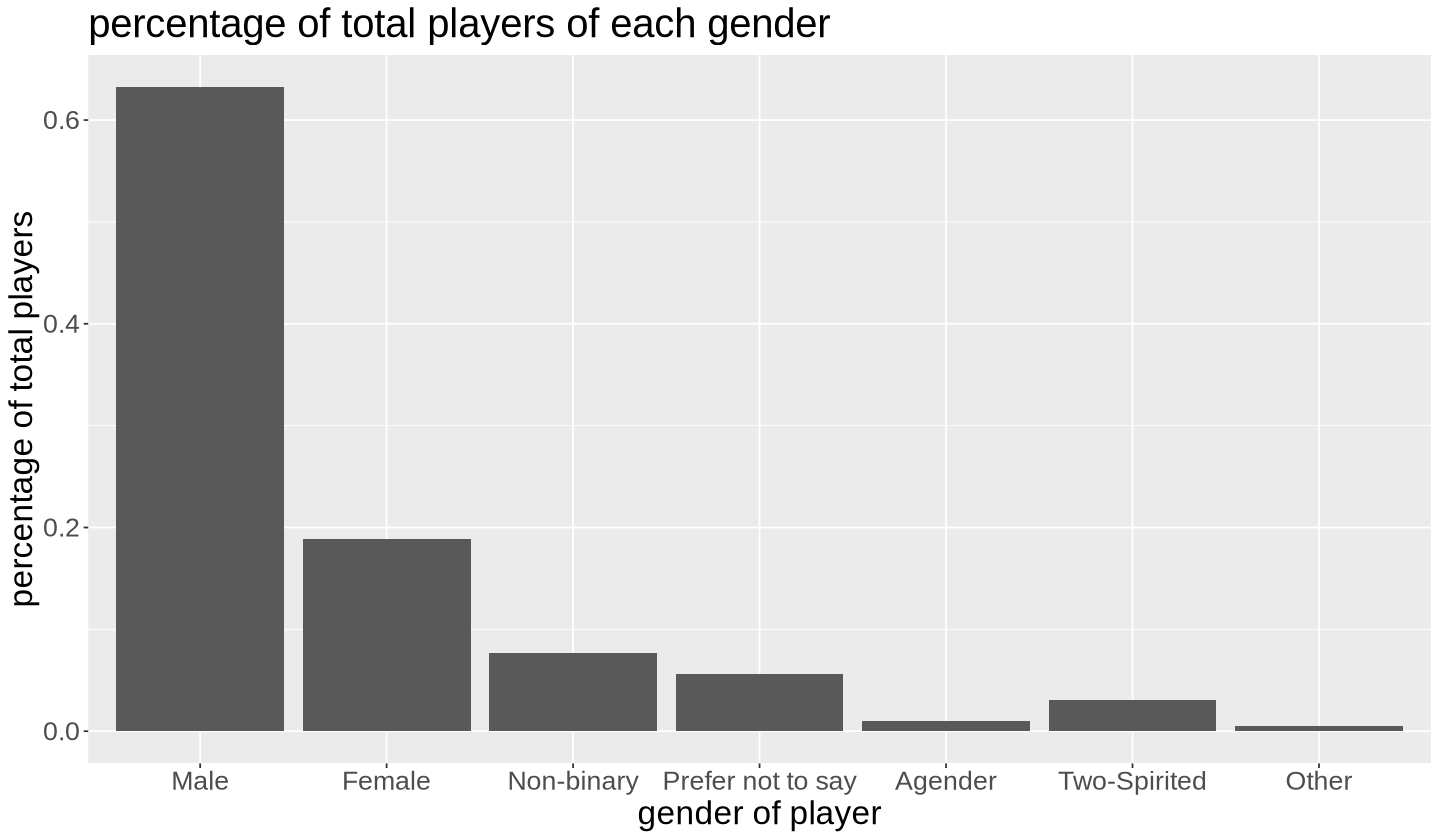

In [19]:
# creating exploratory visuals
options(repr.plot.width = 8, repr.plot.height = 7)

experience_bar_plot <- players_data_wrangled |>
                    ggplot(aes(x = experience, y = played_hours)) +
                    geom_bar(stat = "identity") +
                    labs(x = "level of player experience", y = "total playtime (in hours)", title = "playtime vs. player experience") +
                    theme(text = element_text(size = 20))
experience_bar_plot

options(repr.plot.width = 12, repr.plot.height = 7)

gender_bar_plot <- players_data_wrangled |>
                    ggplot(aes(x = gender, y = played_hours)) +
                    geom_bar(stat = "identity") +
                    labs(x = "gender of the player", y = "total playtime (in hours)", title = "playtime vs. gender") +
                    theme(text = element_text(size = 20))
gender_bar_plot

percentage_exp <- players_data_wrangled |>
                    group_by(experience) |>
                    summarise(count = n()) |>
                    mutate(percentage = count / nrow(players_data_wrangled)) |>
                    ggplot(aes(x = experience, y = percentage)) +
                    geom_bar(stat = "identity") +
                    labs(x = "experience of player", y = "percentage of total players", title = "percentage of total players of each experience level") +
                    theme(text = element_text(size = 20))
percentage_exp 

percentage_gender <- players_data_wrangled |>
                    group_by(gender) |>
                    summarise(count = n()) |>
                    mutate(percentage = count / nrow(players_data_wrangled)) |>
                    ggplot(aes(x = gender, y = percentage)) +
                    geom_bar(stat = "identity") +
                    labs(x = "gender of player", y = "percentage of total players", title = "percentage of total players of each gender") +
                    theme(text = element_text(size = 20))
percentage_gender  

### Insights from the Visualizations

- playtime vs. experience graph: shows us that the experience type of the players that appear to contribute the most playtime is regular experience and the type of player that contibutes the least playtime are veterans.
- playtime vs. gender graph: shows us that the gender of player that appears to contribute the most playtime is the male and the identified gender of the players that contibute the least playtime is two-spirited.
- The last two percentage graphs show the proportion of total players that each type of player (experince or gender) takes up within their respective variable classes, which can give us insight the true level of commitment each group of individuals has to the game.